In [339]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from numpy.random import default_rng
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 

In [340]:
df = pd.read_csv('dist.csv')


In [341]:
# Using regex so that each value that is seperated by a ;
# gets its own column.
df[['A', 'B', 'C']] = df['1.9625391638241747;-0.2093015051962841;1'].str.split(';', expand=True)

df = df.drop('1.9625391638241747;-0.2093015051962841;1', axis=1)
df.loc[len(df)] = ['1.9625391638241747', '-0.2093015051962841', '1']
#new_record = pd.DataFrame([['A':1.9625391638241747, 'B':-0.2093015051962841, 'C':1]], columns=df.columns)
df = df.astype('float')
df.info()
#df = pd.concat([new_record, df], ignore_index=True)
#print(df.iloc[1:3])
#new_record = pd.DataFrame([{'Name':'Jane', 'Age':25, 'Location':'Madrid'}]
#df.loc[len(df)] = ['Jane', 25, 'Madrid']

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       250 non-null    float64
 1   B       250 non-null    float64
 2   C       250 non-null    float64
dtypes: float64(3)
memory usage: 7.8 KB


In [342]:
X = df[['A', 'B']]
y = df['C']
X


,A,B
0,1.819677,-1.170690
1,2.634111,0.034156
2,3.765087,-2.104257
3,5.952117,0.873701
4,1.825612,0.192255
...,...,...
245,5.742110,1.087758
246,6.431381,2.452655
247,6.660350,1.753852
248,7.238425,2.276358


In [343]:
# Validation
df = pd.read_csv('dist_val.csv')
df

,5.145115070525757;3.1600109850128635;0
0,4.8978084946410725;1.8108926170469035;0
1,6.840803291758959;2.57461240235098;0
2,6.6539113346869;0.592462338691915;0
3,4.962545245318675;0.7325971689130012;0
4,5.864476120937141;0.8128459057718282;0
...,...
19994,0.7905706374179646;-1.7327502048569263;1
19995,2.018009791553452;-2.992298693482254;1
19996,0.8825793070491088;0.8121116444757925;1
19997,0.8795492190028895;-3.545631460193093;1


In [344]:
df[['A', 'B', 'C']] = df['5.145115070525757;3.1600109850128635;0'].str.split(';', expand=True)
df = df.drop('5.145115070525757;3.1600109850128635;0', axis=1)
new_record = pd.DataFrame([[5.145115070525757, 3.1600109850128635, 0]], columns=df.columns)
df = pd.concat([new_record, df], ignore_index=True)
df

,A,B,C
0,5.145115,3.160011,0
1,4.8978084946410725,1.8108926170469035,0
2,6.840803291758959,2.57461240235098,0
3,6.6539113346869,0.592462338691915,0
4,4.962545245318675,0.7325971689130012,0
...,...,...,...
19995,0.7905706374179646,-1.7327502048569263,1
19996,2.018009791553452,-2.992298693482254,1
19997,0.8825793070491088,0.8121116444757925,1
19998,0.8795492190028895,-3.545631460193093,1


In [345]:
#df = df.head(50)

In [346]:
# Nej, ska använda x antal element från test ist. Typ 50
X_1 = df[['A', 'B']]
y_1 = df['C']
type(y_test)

pandas.core.series.Series

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


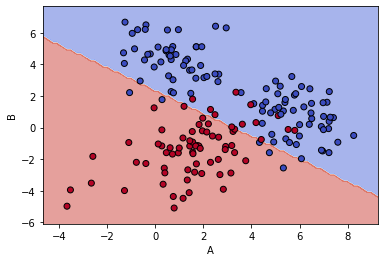

In [348]:
# defining parameter range 
# Linear

param_grid_l = {'C': [0.1, 1, 10],  
              'kernel': ['linear']} 
grid_l = GridSearchCV(SVC(), param_grid_l, refit = True, verbose = 1) 
grid_l.fit(X_train, y_train)
disp = DecisionBoundaryDisplay.from_estimator(grid_l, 
                                              X_train, 
                                              response_method="predict",
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)
disp.ax_.scatter(X_train['A'], X_train['B'], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.show()

# fitting the model for grid search 
#grid.fit(X_train, y_train) 

In [333]:
#grid = svm.SVC(kernel='linear') 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
grid  
grid.fit(X_train, y_train)
print(grid.best_params_)
#y_pred = grid.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


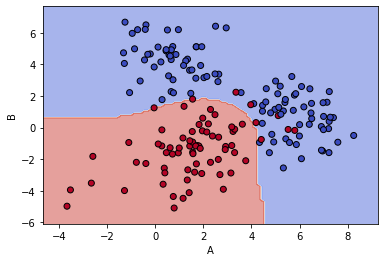

In [337]:
disp = DecisionBoundaryDisplay.from_estimator(grid, 
                                              X_train, 
                                              response_method="predict",
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)
disp.ax_.scatter(X_train['A'], X_train['B'], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.show()

In [297]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [298]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [299]:
# Linear kernel
clf = svm.SVC(kernel='linear') 
clf.fit(X, y)
y_pred = clf.predict(X1)

In [300]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [75, 50]